# Visualizing Tabular Data
---

## Overview
**Questions**
- How can I visualize tabular data in Julia?
- How can I group several plots together?

**Objectives**
- Plot simple graphs from data.
- Group several graphs in a single figure.


## Visualizing Data

The mathematician Richard Hamming once said, “The purpose of computing is insight, not numbers,” and the best way to develop insight is often to visualize data. Visualization deserves an entire lecture of its own, but we can explore a few features of Julia’s implementation of the matplotlib library here. While there is no official plotting library, matplotlib is the de facto standard. First, we will import the Plots package and use two of its functions to create and display a heat map of our data:

[Plots.jl Documentation](https://docs.juliaplots.org/latest/)

In [11]:
# Only Once
import Pkg
Pkg.add("Plots")

  Resolving package versions...
  Installed GLFW_jll ──────── v3.3.3+0
  Installed Qt_jll ────────── v5.15.2+2
  Installed PlotUtils ─────── v1.0.10
  Installed PlotThemes ────── v2.0.1
  Installed Contour ───────── v0.5.7
  Installed Plots ─────────── v1.11.0
  Installed RecipesPipeline ─ v0.3.1
  Installed StructArrays ──── v0.5.0
  Installed GR_jll ────────── v0.53.0+0
  Installed GeometryBasics ── v0.3.11
  Installed Latexify ──────── v0.14.11
docs/src/assets/figures/heatmap4.png: truncated gzip input
tar: Error exit delayed from previous errors.
┌ Warning: failed to extract archive downloaded from https://pkg.julialang.org/package/35d6a980-a343-548e-a6ea-1d62b119f2f4/3141757b5832ee7a0386db87997ee5a23ff20f4d
└ @ Pkg.Operations /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Pkg/src/Operations.jl:559
  Installed GR ────────────── v0.55.0
  Installed ColorSchemes ──── v3.10.2
Updating `~/.julia/environments/v1.5/Project.toml`
  [91a5bcdd] + Plots v1.11.

In [1]:
using Plots, CSV, DataFrames, Statistics

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [2]:
apoedata = DataFrame(CSV.File("../Data/apoe_fold_change.csv"));

In [4]:
E₃ = apoedata.ApoE3;
E₄ = apoedata.ApoE4
Genes = apoedata.Gene;

In [5]:
pyplot() #matplotlib implementation

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


Plots.PyPlotBackend()

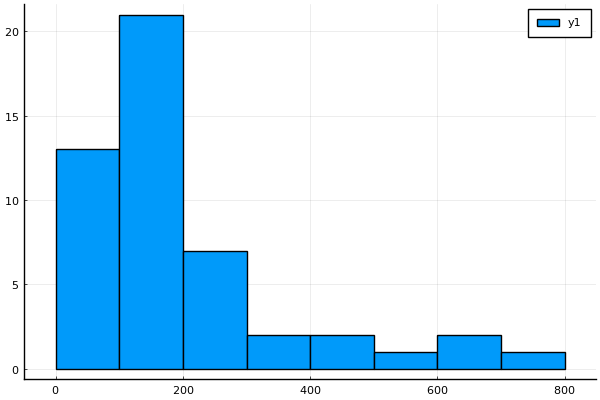

In [29]:
histogram(E₄)

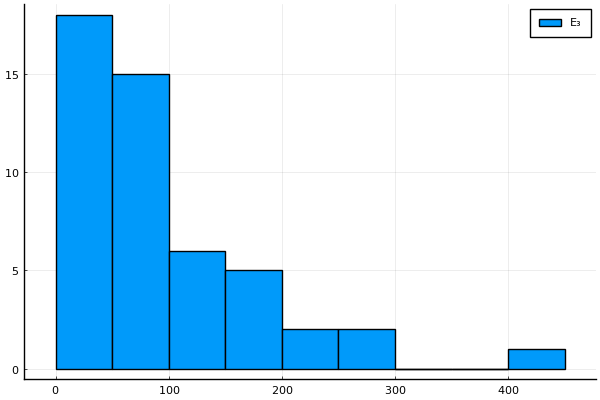

In [32]:
histogram(E₃, lab = "E₃")

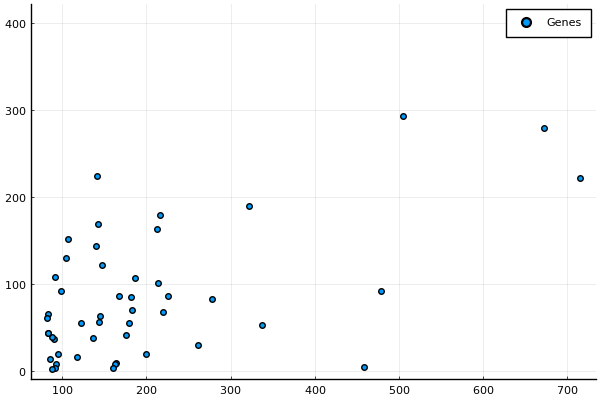

In [36]:
scatter(E₄, E₃, lab = "Genes")

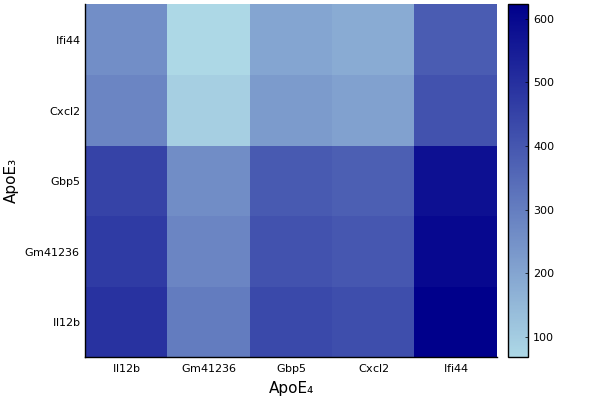

In [28]:
heatmap(Genes[1:5], Genes[1:5],(E₄[1:5].-transpose(E₃[1:5])), c = :blues, xlab="ApoE₄", ylab="ApoE₃")

In [9]:
plot((sort(E₄).- mean(E₄))./std(E₄), lab = "E₄")
plot!((sort(E₃).- mean(E₃))./std(E₃), lab = "E₃")

[Plots Attributes](https://docs.juliaplots.org/latest/attributes/)

## Grouping Plots
---
You can group similar plots in a single figure using subplots. Use the layout keyword, and optionally the convenient @layout macro to generate arbitrarily complex subplot layouts.

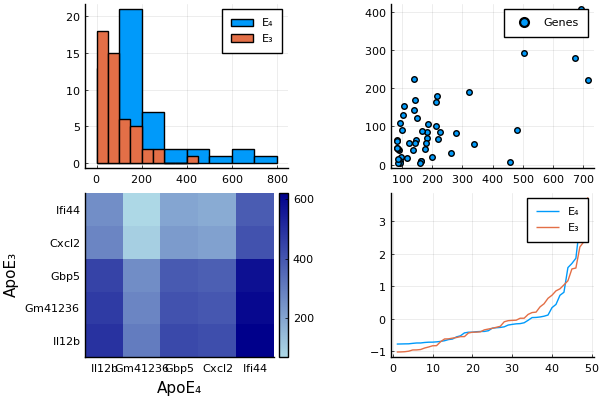

In [10]:
plot(pl₁, pl₂, pl₃,pl₄, layout = 4)

In [11]:
plot(pl₁, pl₂, pl₃, layout = (3,1))

In [22]:
l = @layout [a ; b c]

Plots.GridLayout(2, 1)

In [23]:
fig₁ = plot(pl₁, pl₂, pl₃, layout = l)

The call to `savefig` stores the plot as a graphics file. This can be a convenient way to store your plots for use in other documents, web pages etc. The graphics format is automatically determined by `Plots` from the file name ending we specify; below PNG from ‘fig1.png’. `Plots` supports many different graphics formats, including SVG and PDF.

In [25]:
savefig(fig₁,"fig1.png")

### Play Around
---
You can find some other general examples [here](http://docs.juliaplots.org/latest/tutorial/) and [here](http://docs.juliaplots.org/latest/generated/pyplot/). Additionally, you can adjust various ploat attributes using the parameters found [here](http://docs.juliaplots.org/latest/attributes/).

### 📌 Key Points
---
- Use the Plots package for creating simple visualizations.